In [1]:
using Distributions
using StatsPlots
default(fmt=:png, titlefontsize=10)

safediv(x, y) = x == 0 ? zero(x/y) : x/y
x ⪅ y = x < y || x ≈ y

function pvalue_score(k, n, p)
    phat = k/n
    sehat = √(p * (1 - p) / n)
    z = safediv(phat - p, sehat)
    2ccdf(Normal(), abs(z))
end

function pvalue_clopper_pearson(k, n, p)
    bin = Binomial(n, p)
    min(1, 2cdf(bin, k), 2ccdf(bin, k - 1))
end

function pvalue_sterne(k, n, p)
    bin = Binomial(n, p)
    sum(pdf(bin, j) for j in support(bin) if pdf(bin, j) ⪅ pdf(bin, k))
end

function expectval(f, dist; m=6)
    kmin, kmax = extrema(dist)
    μ, σ = mean(dist), std(dist)
    kmin = max(kmin, round(Int, μ - m*σ))
    kmax = min(kmax, round(Int, μ + m*σ))
    sum(k -> f(k) * pdf(dist, k), kmin:kmax)
end

function power(pvaluefunc, n, p0, p1; α=0.05)
    expectval(k -> pvaluefunc(k, n, p0) < α, Binomial(n, p1))
end

power (generic function with 1 method)

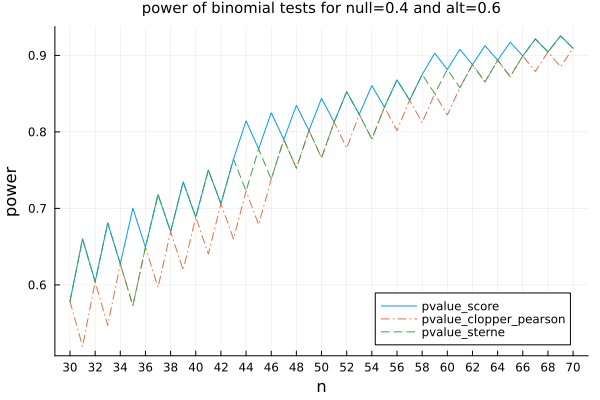

In [2]:
p0, p1 = 0.4, 0.6
ns = 30:70
plot()
plot!(ns, n -> power(pvalue_score, n, p0, p1); label="pvalue_score", c=1)
plot!(ns, n -> power(pvalue_clopper_pearson, n, p0, p1); label="pvalue_clopper_pearson", ls=:dashdot, c=2)
plot!(ns, n -> power(pvalue_sterne, n, p0, p1); label="pvalue_sterne", ls=:dash, c=3)
plot!(xguide="n", yguide="power", xtick=0:2:100, ytick=0:0.1:1, legend=:bottomright)
title!("power of binomial tests for null=$p0 and alt=$p1")

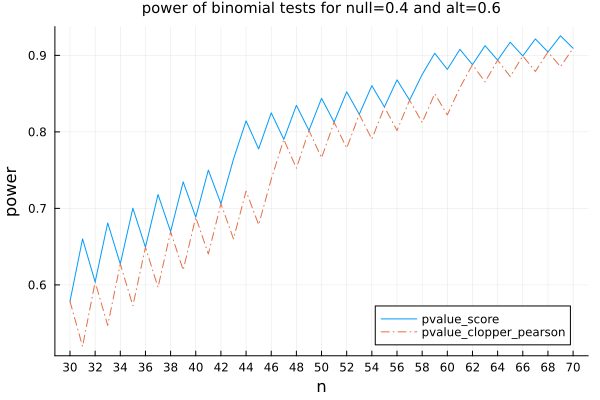

In [3]:
p0, p1 = 0.4, 0.6
ns = 30:70
plot()
plot!(ns, n -> power(pvalue_score, n, p0, p1); label="pvalue_score", c=1)
plot!(ns, n -> power(pvalue_clopper_pearson, n, p0, p1); label="pvalue_clopper_pearson", ls=:dashdot, c=2)
#plot!(ns, n -> power(pvalue_sterne, n, p0, p1); label="pvalue_sterne", ls=:dash, c=3)
plot!(xguide="n", yguide="power", xtick=0:2:100, ytick=0:0.1:1, legend=:bottomright)
title!("power of binomial tests for null=$p0 and alt=$p1")

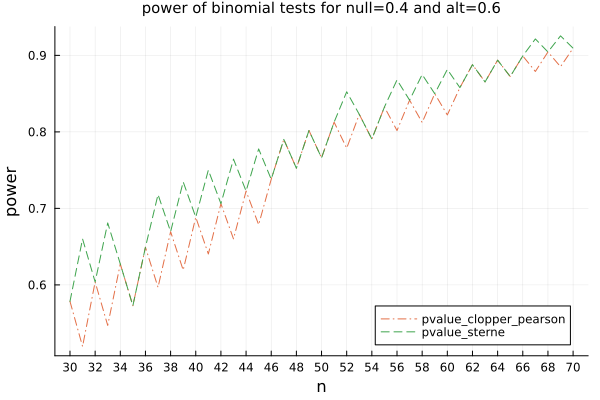

In [4]:
p0, p1 = 0.4, 0.6
ns = 30:70
plot()
#plot!(ns, n -> power(pvalue_score, n, p0, p1); label="pvalue_score", c=1)
plot!(ns, n -> power(pvalue_clopper_pearson, n, p0, p1); label="pvalue_clopper_pearson", ls=:dashdot, c=2)
plot!(ns, n -> power(pvalue_sterne, n, p0, p1); label="pvalue_sterne", ls=:dash, c=3)
plot!(xguide="n", yguide="power", xtick=0:2:100, ytick=0:0.1:1, legend=:bottomright)
title!("power of binomial tests for null=$p0 and alt=$p1")

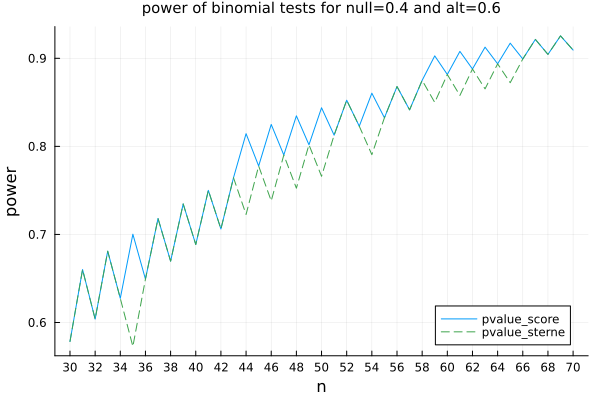

In [5]:
p0, p1 = 0.4, 0.6
ns = 30:70
plot()
plot!(ns, n -> power(pvalue_score, n, p0, p1); label="pvalue_score", c=1)
#plot!(ns, n -> power(pvalue_clopper_pearson, n, p0, p1); label="pvalue_clopper_pearson", ls=:dashdot, c=2)
plot!(ns, n -> power(pvalue_sterne, n, p0, p1); label="pvalue_sterne", ls=:dash, c=3)
plot!(xguide="n", yguide="power", xtick=0:2:100, ytick=0:0.1:1, legend=:bottomright)
title!("power of binomial tests for null=$p0 and alt=$p1")

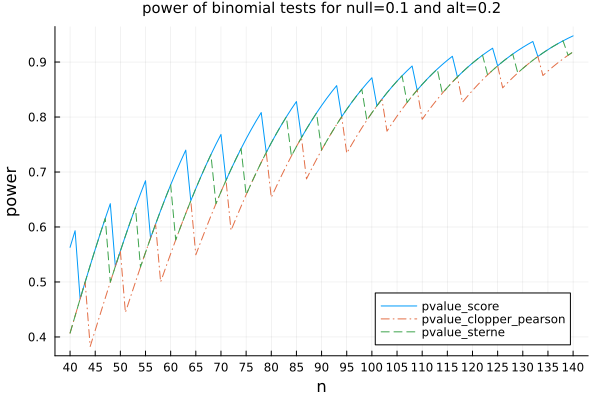

In [6]:
p0, p1 = 0.1, 0.2
ns = 40:140
plot()
plot!(ns, n -> power(pvalue_score, n, p0, p1); label="pvalue_score", c=1)
plot!(ns, n -> power(pvalue_clopper_pearson, n, p0, p1); label="pvalue_clopper_pearson", ls=:dashdot, c=2)
plot!(ns, n -> power(pvalue_sterne, n, p0, p1); label="pvalue_sterne", ls=:dash, c=3)
plot!(xguide="n", yguide="power", xtick=0:5:200, ytick=0:0.1:1, legend=:bottomright)
title!("power of binomial tests for null=$p0 and alt=$p1")

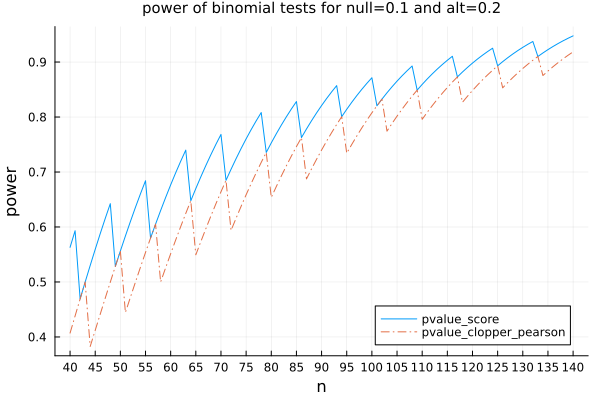

In [7]:
p0, p1 = 0.1, 0.2
ns = 40:140
plot()
plot!(ns, n -> power(pvalue_score, n, p0, p1); label="pvalue_score", c=1)
plot!(ns, n -> power(pvalue_clopper_pearson, n, p0, p1); label="pvalue_clopper_pearson", ls=:dashdot, c=2)
#plot!(ns, n -> power(pvalue_sterne, n, p0, p1); label="pvalue_sterne", ls=:dash, c=3)
plot!(xguide="n", yguide="power", xtick=0:5:200, ytick=0:0.1:1, legend=:bottomright)
title!("power of binomial tests for null=$p0 and alt=$p1")

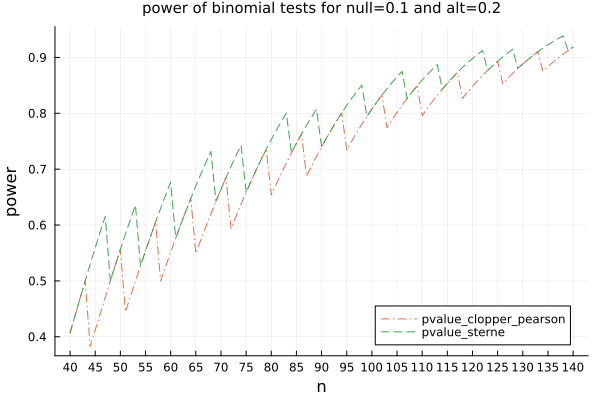

In [8]:
p0, p1 = 0.1, 0.2
ns = 40:140
plot()
#plot!(ns, n -> power(pvalue_score, n, p0, p1); label="pvalue_score", c=1)
plot!(ns, n -> power(pvalue_clopper_pearson, n, p0, p1); label="pvalue_clopper_pearson", ls=:dashdot, c=2)
plot!(ns, n -> power(pvalue_sterne, n, p0, p1); label="pvalue_sterne", ls=:dash, c=3)
plot!(xguide="n", yguide="power", xtick=0:5:200, ytick=0:0.1:1, legend=:bottomright)
title!("power of binomial tests for null=$p0 and alt=$p1")

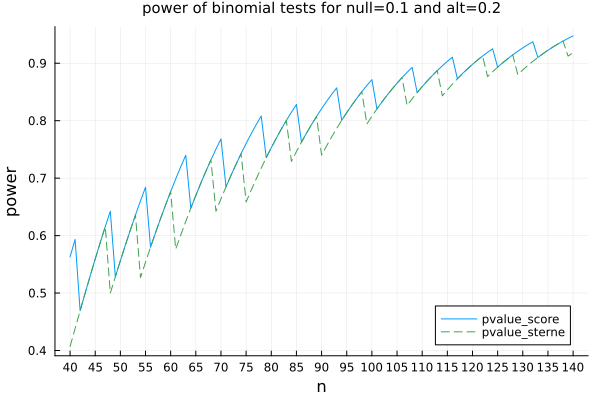

In [9]:
p0, p1 = 0.1, 0.2
ns = 40:140
plot()
plot!(ns, n -> power(pvalue_score, n, p0, p1); label="pvalue_score", c=1)
#plot!(ns, n -> power(pvalue_clopper_pearson, n, p0, p1); label="pvalue_clopper_pearson", ls=:dashdot, c=2)
plot!(ns, n -> power(pvalue_sterne, n, p0, p1); label="pvalue_sterne", ls=:dash, c=3)
plot!(xguide="n", yguide="power", xtick=0:5:200, ytick=0:0.1:1, legend=:bottomright)
title!("power of binomial tests for null=$p0 and alt=$p1")

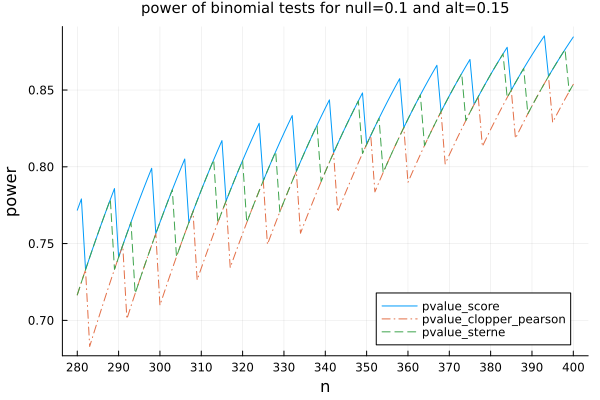

In [10]:
p0, p1 = 0.1, 0.15
ns = 280:400
plot()
plot!(ns, n -> power(pvalue_score, n, p0, p1); label="pvalue_score", c=1)
plot!(ns, n -> power(pvalue_clopper_pearson, n, p0, p1); label="pvalue_clopper_pearson", ls=:dashdot, c=2)
plot!(ns, n -> power(pvalue_sterne, n, p0, p1); label="pvalue_sterne", ls=:dash, c=3)
plot!(xguide="n", yguide="power", xtick=0:10:500, ytick=0:0.05:1, legend=:bottomright)
title!("power of binomial tests for null=$p0 and alt=$p1")

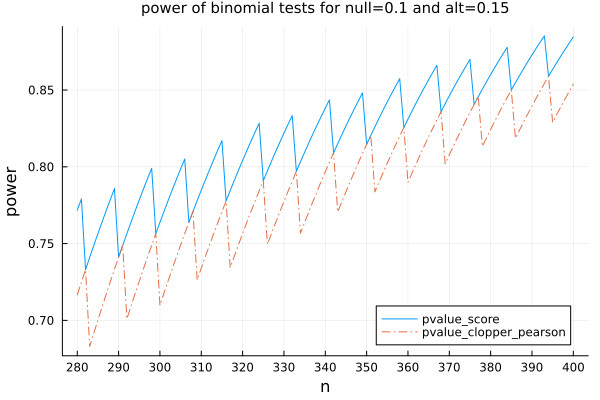

In [11]:
p0, p1 = 0.1, 0.15
ns = 280:400
plot()
plot!(ns, n -> power(pvalue_score, n, p0, p1); label="pvalue_score", c=1)
plot!(ns, n -> power(pvalue_clopper_pearson, n, p0, p1); label="pvalue_clopper_pearson", ls=:dashdot, c=2)
#plot!(ns, n -> power(pvalue_sterne, n, p0, p1); label="pvalue_sterne", ls=:dash, c=3)
plot!(xguide="n", yguide="power", xtick=0:10:500, ytick=0:0.05:1, legend=:bottomright)
title!("power of binomial tests for null=$p0 and alt=$p1")

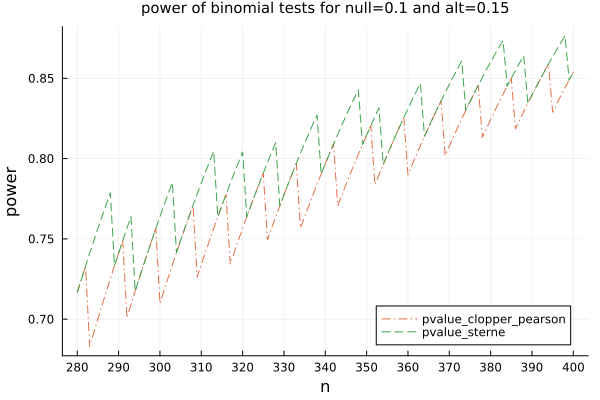

In [12]:
p0, p1 = 0.1, 0.15
ns = 280:400
plot()
#plot!(ns, n -> power(pvalue_score, n, p0, p1); label="pvalue_score", c=1)
plot!(ns, n -> power(pvalue_clopper_pearson, n, p0, p1); label="pvalue_clopper_pearson", ls=:dashdot, c=2)
plot!(ns, n -> power(pvalue_sterne, n, p0, p1); label="pvalue_sterne", ls=:dash, c=3)
plot!(xguide="n", yguide="power", xtick=0:10:500, ytick=0:0.05:1, legend=:bottomright)
title!("power of binomial tests for null=$p0 and alt=$p1")

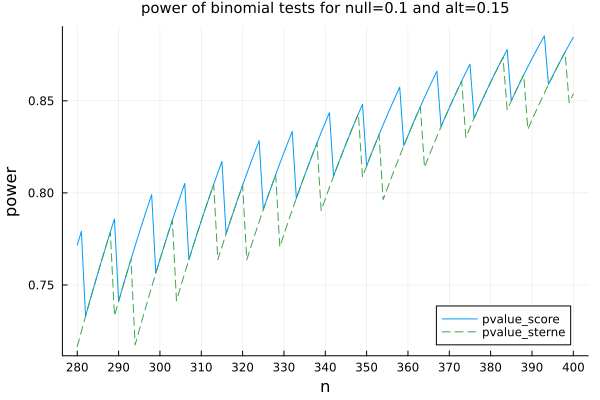

In [13]:
p0, p1 = 0.1, 0.15
ns = 280:400
plot()
plot!(ns, n -> power(pvalue_score, n, p0, p1); label="pvalue_score", c=1)
#plot!(ns, n -> power(pvalue_clopper_pearson, n, p0, p1); label="pvalue_clopper_pearson", ls=:dashdot, c=2)
plot!(ns, n -> power(pvalue_sterne, n, p0, p1); label="pvalue_sterne", ls=:dash, c=3)
plot!(xguide="n", yguide="power", xtick=0:10:500, ytick=0:0.05:1, legend=:bottomright)
title!("power of binomial tests for null=$p0 and alt=$p1")

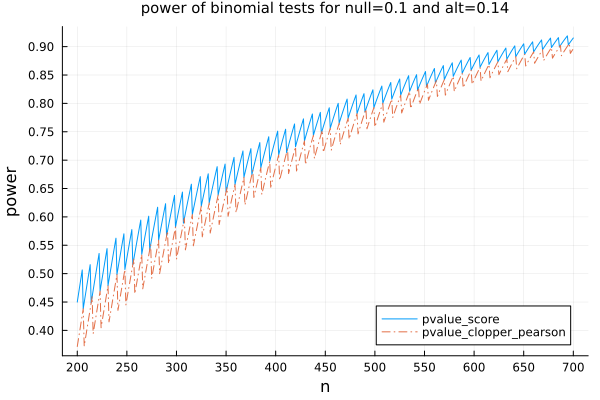

In [14]:
p0, p1 = 0.1, 0.14
ns = 200:700
plot()
plot!(ns, n -> power(pvalue_score, n, p0, p1); label="pvalue_score", c=1)
plot!(ns, n -> power(pvalue_clopper_pearson, n, p0, p1); label="pvalue_clopper_pearson", ls=:dashdot, c=2)
#plot!(ns, n -> power(pvalue_sterne, n, p0, p1); label="pvalue_sterne", ls=:dash, c=3)
plot!(xguide="n", yguide="power", xtick=0:50:1000, ytick=0:0.05:1, legend=:bottomright)
title!("power of binomial tests for null=$p0 and alt=$p1")

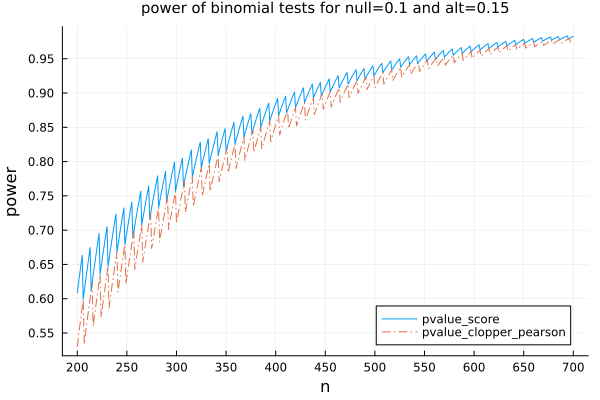

In [15]:
p0, p1 = 0.1, 0.15
ns = 200:700
plot()
plot!(ns, n -> power(pvalue_score, n, p0, p1); label="pvalue_score", c=1)
plot!(ns, n -> power(pvalue_clopper_pearson, n, p0, p1); label="pvalue_clopper_pearson", ls=:dashdot, c=2)
#plot!(ns, n -> power(pvalue_sterne, n, p0, p1); label="pvalue_sterne", ls=:dash, c=3)
plot!(xguide="n", yguide="power", xtick=0:50:1000, ytick=0:0.05:1, legend=:bottomright)
title!("power of binomial tests for null=$p0 and alt=$p1")

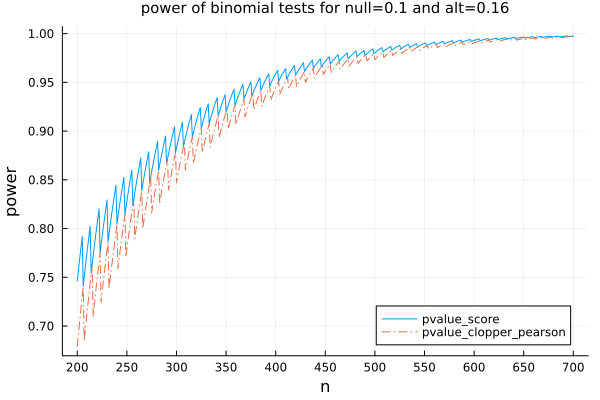

In [16]:
p0, p1 = 0.1, 0.16
ns = 200:700
plot()
plot!(ns, n -> power(pvalue_score, n, p0, p1); label="pvalue_score", c=1)
plot!(ns, n -> power(pvalue_clopper_pearson, n, p0, p1); label="pvalue_clopper_pearson", ls=:dashdot, c=2)
#plot!(ns, n -> power(pvalue_sterne, n, p0, p1); label="pvalue_sterne", ls=:dash, c=3)
plot!(xguide="n", yguide="power", xtick=0:50:1000, ytick=0:0.05:1, legend=:bottomright)
title!("power of binomial tests for null=$p0 and alt=$p1")